In this file we will extract text in the 'researchproblem.json' file for both training and test dataset and save into csv triple file for experiments

In [10]:
#import librairies
import os, sys, json, glob
import pandas as pd
import csv
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline


In [28]:
def get_data(directory):
    source = []
    target = []
    my_list = []

    # Start the loop
    for folder, sub_folders, files in os.walk(directory):
      for special_file in files:
        if special_file == 'research-problem.json':
          file_path = os.path.join(folder, special_file)

          # Open and read
          with open(file_path, 'r+') as read_file:
            r = read_file.read()
            rd = json.loads(r)
            for i in rd['has research problem'][0]:
                my_list.append(i)
    
    for i in my_list:
        if isinstance(i, str):
            source.append(i)
        else:
            if isinstance(i, dict):
                for k, v in i.items():
                    target.append(v)

     # read_file.close()
    csv_columns = ['subject', 'predicate', 'object']
    data = {
            'subject': 'contribution',
            'predicate': target,
            'object': source
        }

    #print(data.items())
    df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data.items() ]))
    
    return df


            
          

In [ ]:
train_directory = '/train-data'


train = get_data(train_directory)
train.to_csv('datasets/train-data.csv')

In [ ]:
test_directory = '/test-data'


test = get_data(test_directory)
test.to_csv('datasets/test-data.csv')

Now let's have a look on our dataset

In [50]:
test_data = pd.read_csv('datasets/test-data.csv')
test_data

,Unnamed: 0,subject,predicate,object
0,0,contribution,One Single Deep Bidirectional LSTM Network for...,Word Sense Disambiguation
1,1,NaN,Joint Learning of the Embedding of Words and E...,Named Entity Disambiguation
2,2,NaN,Pre-training of Deep Contextualized Embeddings...,Named Entity Disambiguation
3,3,NaN,Neural Sequence Learning Models for Word Sense...,Word Sense Disambiguation
4,4,NaN,Semi-supervised Word Sense Disambiguation with...,Semi-supervised Word Sense Disambiguation
...,...,...,...,...
965,965,NaN,NaN,n
966,966,NaN,NaN,g
967,967,NaN,NaN,Neural Network Transition - Based Parsing
968,968,NaN,NaN,joint POS tagging and dependency parsing


In [51]:
#we drop the fisrt column
test_data = test_data.iloc[: , 1:]
test_data

,subject,predicate,object
0,contribution,One Single Deep Bidirectional LSTM Network for...,Word Sense Disambiguation
1,NaN,Joint Learning of the Embedding of Words and E...,Named Entity Disambiguation
2,NaN,Pre-training of Deep Contextualized Embeddings...,Named Entity Disambiguation
3,NaN,Neural Sequence Learning Models for Word Sense...,Word Sense Disambiguation
4,NaN,Semi-supervised Word Sense Disambiguation with...,Semi-supervised Word Sense Disambiguation
...,...,...,...
965,NaN,NaN,n
966,NaN,NaN,g
967,NaN,NaN,Neural Network Transition - Based Parsing
968,NaN,NaN,joint POS tagging and dependency parsing


In [52]:
#our triples is as folows: <subject, predicate, object> with subject= contribution
#as the contribution is not specified, we will fill the value 'contribution' in the colums subject

test_data['subject'] = test_data['subject'].replace(np.nan, 'contribution')
test_data

,subject,predicate,object
0,contribution,One Single Deep Bidirectional LSTM Network for...,Word Sense Disambiguation
1,contribution,Joint Learning of the Embedding of Words and E...,Named Entity Disambiguation
2,contribution,Pre-training of Deep Contextualized Embeddings...,Named Entity Disambiguation
3,contribution,Neural Sequence Learning Models for Word Sense...,Word Sense Disambiguation
4,contribution,Semi-supervised Word Sense Disambiguation with...,Semi-supervised Word Sense Disambiguation
...,...,...,...
965,contribution,NaN,n
966,contribution,NaN,g
967,contribution,NaN,Neural Network Transition - Based Parsing
968,contribution,NaN,joint POS tagging and dependency parsing


In [53]:
#we remove NAN values in the dataframe
data2 = test_data.dropna(inplace=True)
test_data

In [55]:
test_data.to_csv('datasets/test-data.csv')

In [35]:
train_data = pd.read_csv('datasets/train-data.csv')
train_data


,Unnamed: 0,subject,predicate,object
0,0,contribution,SCIBERT : A Pretrained Language Model for Scie...,Pretrained Language Model
1,1,NaN,Joint Extraction of Entities and Relations Bas...,Joint Extraction of Entities and Relations
2,2,NaN,Joint entity recognition and relation extracti...,Joint entity recognition and relation extraction
3,3,NaN,Data and text mining BioBERT : a pre-trained b...,pre-trained biomedical language representation
4,4,NaN,Semantic Relation Classification via Bidirecti...,Semantic Relation Classification
...,...,...,...,...
377,377,NaN,NaN,Joint Extraction of Entity Mentions and Relations
378,378,NaN,NaN,Distant Supervision for Relation Extraction
379,379,NaN,NaN,Sequential Sentence Classification in Medical ...
380,380,NaN,NaN,Sentence Classification


In [36]:
train_data = train_data.iloc[: , 1:]
train_data


,subject,predicate,object
0,contribution,SCIBERT : A Pretrained Language Model for Scie...,Pretrained Language Model
1,NaN,Joint Extraction of Entities and Relations Bas...,Joint Extraction of Entities and Relations
2,NaN,Joint entity recognition and relation extracti...,Joint entity recognition and relation extraction
3,NaN,Data and text mining BioBERT : a pre-trained b...,pre-trained biomedical language representation
4,NaN,Semantic Relation Classification via Bidirecti...,Semantic Relation Classification
...,...,...,...
377,NaN,NaN,Joint Extraction of Entity Mentions and Relations
378,NaN,NaN,Distant Supervision for Relation Extraction
379,NaN,NaN,Sequential Sentence Classification in Medical ...
380,NaN,NaN,Sentence Classification


In [37]:
train_data['subject'] = train_data['subject'].replace(np.nan, 'contribution')
train_data


,subject,predicate,object
0,contribution,SCIBERT : A Pretrained Language Model for Scie...,Pretrained Language Model
1,contribution,Joint Extraction of Entities and Relations Bas...,Joint Extraction of Entities and Relations
2,contribution,Joint entity recognition and relation extracti...,Joint entity recognition and relation extraction
3,contribution,Data and text mining BioBERT : a pre-trained b...,pre-trained biomedical language representation
4,contribution,Semantic Relation Classification via Bidirecti...,Semantic Relation Classification
...,...,...,...
377,contribution,NaN,Joint Extraction of Entity Mentions and Relations
378,contribution,NaN,Distant Supervision for Relation Extraction
379,contribution,NaN,Sequential Sentence Classification in Medical ...
380,contribution,NaN,Sentence Classification


In [40]:
data3 = train_data.dropna(inplace=True)

In [48]:
train_data.to_csv('datasets/train-data.csv')

Let's create a directed-graph from a dataframe with all the relations that we have

In [13]:
df = pd.read_csv('datasets/train-data.csv')
df.head()

,Unnamed: 0,subject,predicate,object
0,0,contribution,SCIBERT : A Pretrained Language Model for Scie...,Pretrained Language Model
1,1,contribution,Joint Extraction of Entities and Relations Bas...,Joint Extraction of Entities and Relations
2,2,contribution,Joint entity recognition and relation extracti...,Joint entity recognition and relation extraction
3,3,contribution,Data and text mining BioBERT : a pre-trained b...,pre-trained biomedical language representation
4,4,contribution,Semantic Relation Classification via Bidirecti...,Semantic Relation Classification


In [4]:
df = df.iloc[: , 1:]
df

,subject,predicate,object
0,contribution,SCIBERT : A Pretrained Language Model for Scie...,Pretrained Language Model
1,contribution,Joint Extraction of Entities and Relations Bas...,Joint Extraction of Entities and Relations
2,contribution,Joint entity recognition and relation extracti...,Joint entity recognition and relation extraction
3,contribution,Data and text mining BioBERT : a pre-trained b...,pre-trained biomedical language representation
4,contribution,Semantic Relation Classification via Bidirecti...,Semantic Relation Classification
...,...,...,...
278,contribution,Going out on a limb : Joint Extraction of Enti...,e
279,contribution,Distant Supervision for Relation Extraction vi...,a
280,contribution,Hierarchical Neural Networks for Sequential Se...,r
281,contribution,Translations as Additional Contexts for Senten...,n


In [8]:
G=nx.from_pandas_edgelist(df, "predicate", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

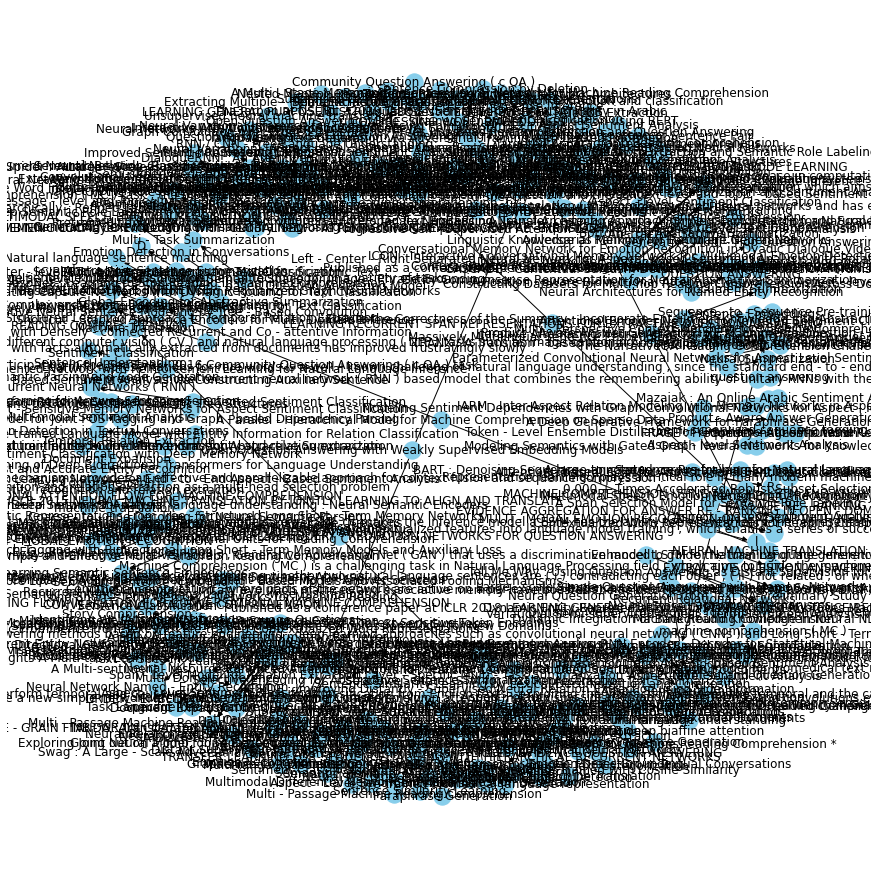

In [11]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()